In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{gensymb} \usepackage{siunitx}'
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 12

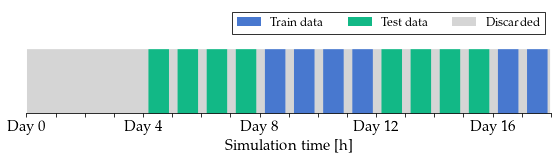

In [137]:

LENGTH = 18 * 24
WARMUP = 4 * 24

time = np.arange(LENGTH)
cycle = np.tile(np.arange(24), LENGTH // 24)
ones = np.ones(LENGTH).astype(bool)
zeros = np.zeros(LENGTH).astype(bool)

data = ones.copy()
data[time < 4 * 24] = 0
data[(cycle > 21) | (cycle < 5)] = 0
discarded = ~data



train_mask = np.array([True, False])
train_mask = train_mask.repeat(4)
train_mask = np.tile(train_mask, 10)
train_mask = np.repeat(train_mask, 24)
train_mask = train_mask[:len(data)]

train_data = data * train_mask
test_data = data * ~train_mask


with plt.style.context('seaborn-muted'):
  fig, ax = plt.subplots(1, 1, figsize=(8, 2.5,))
  colors = sns.color_palette()

  # plot
  ax.fill_between(time, train_data, zeros, color=colors[0], step="pre", label='Train data', linewidth=0)
  ax.fill_between(time, test_data, zeros, color='#12B886', step="pre", label='Test data', linewidth=0)
  ax.fill_between(time, discarded, zeros, color='grey', alpha=0.33, step="pre", label='Discarded', linewidth=0)

  # x axis
  ax.set_xlim(0, LENGTH)
  xticks = np.arange(0, LENGTH + 1, 24)
  ax.set_xticks(xticks)
  xtickslabels = [f'Day {x // 24}' if not x % (4 * 24) else '' for x in xticks]
  ax.set_xticklabels(xtickslabels)
  ax.set_xlabel(r'Simulation time [\unit{\hour}]')

  # cleanup
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.set_yticks(())
  ax.set_ylim(0, 1.66)

  # legend
  legend = ax.legend(loc='upper right', fancybox=False, shadow=False, ncol=5, frameon=True, edgecolor='black')

  plt.tight_layout()
  plt.savefig('preprocessing_traintestsplit.png', dpi=200, facecolor='white')